In [1]:
import numpy
import scipy
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from tclab import TCLab, clock, Historian, Plotter, setup
%matplotlib inline

In [2]:
t=numpy.linspace(0, 800, 1000)
ksteel=16.3
σ=5.670*10**-8
hair=15
kepoxy=2.60
α1=0.50
α2=0.50
Ah=271**-6
As=7*10**-7
mh=0.004
ms=0.001
mf=0.01
mm=0.006
d_xm=0.001
d_xf=0.001
d_xe=0.0001
L=0.0019
thickness=0.001
w=0.01
Aexp=7*10**-5
Am=1.52*10**-4
Amback=1.52*10**-4
Af=3.9*10**-5
Afback=1.1*10**-4
ηfin=0.8689
M=35.0285
Lc=19.5*10**-3
hgap=1900
Ti=298.15
n=5
ϵ=0.99
Cps=502.416
   

In [3]:

Lc = L+thickness/2
Af = 2*w*Lc
M = numpy.sqrt(2*hair/(ksteel*thickness))
ηfin = numpy.tanh(M*Lc)/(M*Lc)


In [4]:
def Q1_step(t):
    if t<200:
        return 0
    else:
        return 20

def Q2_step(t):
    if t<200:
        return 0
    else:
        return 0


In [5]:
tspan=numpy.linspace(0,1000,2500)
def model(T,t):
    
    
    TH1,TH2,TS1,TS2,TM1i,TM2i,TM1o,TM2o,TF1i,TF2i,TF1o,TF2o=T
    Q1=Q1_step(t)
    Q2=Q2_step(t)
    
    dTH1dt=(((-kepoxy*Ah*(TH1-TS1))/d_xe)-(hair*Ah*(TH1-Ti))-(hgap*Ah*(TH1-TM1i))-(ϵ*σ*Ah*(TH1**4-Ti**4))+α1*Q1)/(mh*Cps)
    dTH2dt=(((-kepoxy*Ah*(TH2-TS2))/d_xe)-(hair*Ah*(TH2-Ti))-(hgap*Ah*(TH2-TM2i))-(ϵ*σ*Ah*(TH2**4-Ti**4))+α2*Q2)/(mh*Cps)
    dTS1dt=(((kepoxy*Ah*(TH1-TS1))/d_xe)-(hair*As*(TS1-Ti))-(ϵ*σ*As*(TS1**4-Ti**4)))/(ms*Cps)
    dTS2dt=(((kepoxy*Ah*(TH2-TS2))/d_xe)-(hair*As*(TS2-Ti))-(ϵ*σ*As*(TS2**4-Ti**4)))/(ms*Cps)
    dTM1idt=(hgap*Ah*(TH1-TM1i)-(hair*Aexp*(TM1i-Ti))-(ϵ*σ*Aexp*(TM1i*4-Ti**4))+((-ksteel*Am*(TM1i-TM1o)/d_xm)))/(mm*Cps)
    dTM2idt=(hgap*Ah*(TH2-TM2i)-(hair*Aexp*(TM2i-Ti))-(ϵ*σ*Aexp*(TM2i*4-Ti**4))+((-ksteel*Am*(TM2i-TM2o)/d_xm)))/(mm*Cps)    
    dTM1odt=((ksteel*Am*(TM1i-TM1o)/d_xm)-(hair*Amback*(TM1o-TF1i)))/(mm*Cps)
    dTM2odt=((ksteel*Am*(TM2i-TM2o)/d_xm)-(hair*Amback*(TM2o-TF2i)))/(mm*Cps)
    dTF1idt=((hair*Amback*(TM1o-TF1i))-(ksteel*Afback*(TF1i-TF1o)/d_xf))/(mf*Cps)
    dTF2idt=((hair*Amback*(TM2o-TF2i))-(ksteel*Afback*(TF2i-TF2o)/d_xf))/(mf*Cps)
    dTF1odt=((ksteel*Afback*(TF1i-TF1o)/d_xf)-(hair*Afback*(TF1o-Ti))-(ϵ*σ*Afback*(TF1o**4-Ti**4))-(n*ηfin*hair*Af*(TF1o-TF2o))-(n*ηfin*hair*Af*(TF1o-Ti))+(n*ηfin*hair*Af*(TF2o-TF1o)-(n*ηfin*ϵ*σ*Af*(TF1o**4-Ti**4))))/(mf*Cps)
    dTF2odt=((ksteel*Afback*(TF2i-TF2o)/d_xf)-(hair*Afback*(TF2o-Ti))-(ϵ*σ*Afback*(TF2o**4-Ti**4))-(n*ηfin*hair*Af*(TF2o-TF1o))-(n*ηfin*hair*Af*(TF2o-Ti))+(n*ηfin*hair*Af*(TF1o-TF2o)-(n*ηfin*ϵ*σ*Af*(TF2o**4-Ti**4))))/(mf*Cps) 
    
    return dTH1dt,dTH2dt,dTS1dt,dTS2dt,dTM1idt,dTM2idt,dTM1odt,dTM2odt,dTF1idt,dTF2idt,dTF1odt,dTF2odt
    
    
   

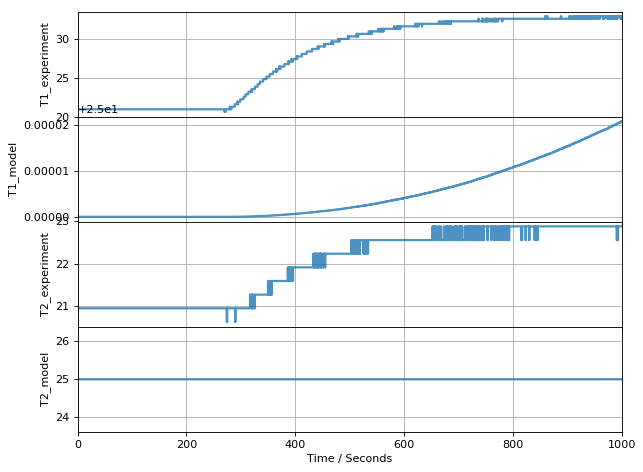

TCLab Model disconnected successfully.


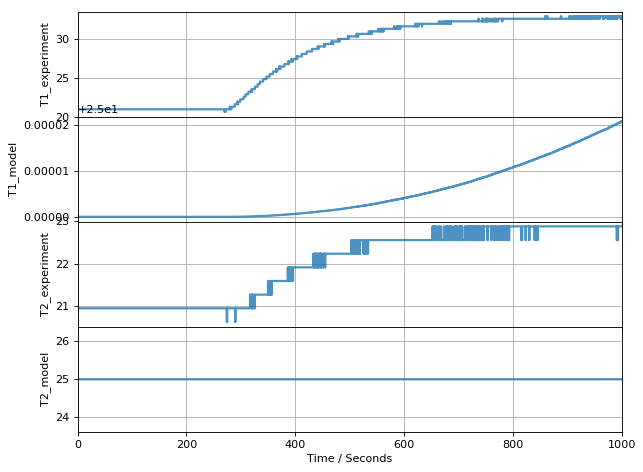

In [6]:
TCLab = setup(connected = False, speedup = 1000)
with TCLab() as lab:
    h5 = Historian([('T1_experiment', lambda:lab.T1), ('T1_model', lambda:To[2]-273.15), ('T2_experiment', lambda:lab.T2), ('T2_model', lambda:To[3]-273.15)])
    p = Plotter(h5,1000)
    
    dt= 0.45
    To=[25+273.15, 25+273.15, 25+273.15, 25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15 ]
    TH1,TH2,TS1,TS2,TM1i,TM2i,TM1o,TM2o,TF1i,TF2i,TF1o,TF2o=To


    for t in clock(1000):
        lab.Q1(Q1_step(t))
        lab.Q2(Q2_step(t))

        To = TH1,TH2,TS1,TS2,TM1i,TM2i,TM1o,TM2o,TF1i,TF2i,TF1o,TF2o
        dTH1dt,dTH2dt,dTS1dt,dTS2dt,dTM1idt,dTM2idt,dTM1odt,dTM2odt,dTF1idt,dTF2idt,dTF1odt,dTF2odt= model(To, t)
    
        TH1+=dTH1dt*dt
        TH2+=dTH2dt*dt
        TS1+=dTS1dt*dt
        TS2+=dTS2dt*dt
        TM1i+=dTM1idt*dt
        TM2i+=dTM2idt*dt
        TM1o+=dTM1odt*dt
        TM2o+=dTM2odt*dt
        TF1i+=dTF1idt*dt
        TF2i+=dTF2idt*dt
        TF1o+=dTF1odt*dt
        TF2o+=dTF2odt*dt
        
        To = TH1,TH2,TS1,TS2,TM1i,TM2i,TM1o,TM2o,TF1i,TF2i,TF1o,TF2o
        h5.update(t)
        p.update(t)
        

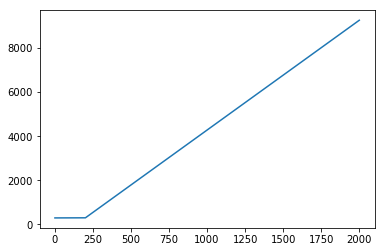

In [7]:
tspan=numpy.linspace(0,2000,4000)
def check():
    dt=tspan[1]
    To=[25+273.15, 25+273.15, 25+273.15, 25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15,25+273.15 ]
    TH1,TH2,TS1,TS2,TM1i,TM2i,TM1o,TM2o,TF1i,TF2i,TF1o,TF2o=To
    
    list1=[]
    list2=[]
    list3=[]
    list4=[]
    list5=[]
    list6=[]
    list7=[]
    list8=[]
    list9=[]
    list10=[]
    list11=[]
    list12=[]
    for t in tspan:
        dTH1dt,dTH2dt,dTS1dt,dTS2dt,dTM1idt,dTM2idt,dTM1odt,dTM2odt,dTF1idt,dTF2idt,dTF1odt,dTF2odt=model(To,t)
        
        TH1+=dTH1dt*dt
        TH2+=dTH2dt*dt
        TS1+=dTS1dt*dt
        TS2+=dTS2dt*dt
        TM1i+=dTM1idt*dt
        TM2i+=dTM2idt*dt
        TM1o+=dTM1odt*dt
        TM2o+=dTM2odt*dt
        TF1i+=dTF1idt*dt
        TF2i+=dTF2idt*dt
        TF1o+=dTF1odt*dt
        TF2o+=dTF2odt*dt

        list1.append(TH1)
        list2.append(TH2)
        list3.append(TS1)
        list4.append(TS2)
        list5.append(TM1i)
        list6.append(TM2i)
        list7.append(TM1o)
        list8.append(TM2o)
        list9.append(TF1i)
        list10.append(TF2i)
        list11.append(TF1o)
        list12.append(TF1o)
    return list1, list2, list3, list4, list5, list6, list7, list8, list9, list10, list11, list12
TH1,TH2,TS1,TS2,TM1i,TM2i,TM1o,TM2o,TF1i,TF2i,TF1o,TF2o=check()
plt.plot(tspan, TH1)